In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten, Dense
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('./drive/MyDrive/Nutrient_Binary')


['Test_data', 'Train_data']

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.
    
    )
# val_datagen = ImageDataGenerator(rescale = 1/255.)
# train_gen = train_datagen.flow_from_directory(directory=directory, color_mode='grayscale', target_size=(224,224), batch_size=32, subset='training', shuffle=False, class_mode='sparse')
# val_gen = train_datagen.flow_from_directory(directory=directory, color_mode='grayscale', target_size=(224,224), batch_size=32, subset='validation', shuffle=False, class_mode='sparse')

train_gen = train_datagen.flow_from_directory(directory='./drive/MyDrive/Nutrient_Binary/Train_data', color_mode='rgb', target_size=(224, 224), batch_size=64, subset='training', shuffle=True, class_mode='categorical')
#val_gen = train_datagen.flow_from_directory(directory='./drive/MyDrive/EDL_PROJECT_DATA/Test_data', color_mode='rgb', target_size=(224, 224), batch_size=32, subset='validation', shuffle=True, class_mode='binary')

Found 4009 images belonging to 2 classes.


In [ ]:
import os
os.listdir('./drive/MyDrive/Nutrient_Binary/Test_data')

['1', '0']

In [ ]:
# generate test set
def generate_dataset(path):
  data_train = []
  labels_train = []
  label_out = [0,1]
  # path = './drive/MyDrive/Final_Data_EDL/{}/Good/Good_training'
  for items in label_out:
    path_new = path.format(items)
    for i,images in enumerate(os.listdir(path_new)):
      print(i/len(os.listdir(path_new)))
      if images=='output':
        continue
      else:
        image_act = cv2.imread(path_new+'/' + images)
        image_act = cv2.resize(image_act, (224, 224))
        data_train.append(image_act)
        labels_train.append(items)
  return data_train, labels_train



In [ ]:
path_test = './drive/MyDrive/Nutrient_Binary/Test_data/{}'
# path_train = './drive/MyDrive/Final_Data_EDL/{}/Good/Good_training'
# data_train, labels_train = generate_dataset(path_train)
data_test, labels_test = generate_dataset(path_test)


0.0
0.016666666666666666
0.03333333333333333
0.05
0.06666666666666667
0.08333333333333333
0.1
0.11666666666666667
0.13333333333333333
0.15
0.16666666666666666
0.18333333333333332
0.2
0.21666666666666667
0.23333333333333334
0.25
0.26666666666666666
0.2833333333333333
0.3
0.31666666666666665
0.3333333333333333
0.35
0.36666666666666664
0.38333333333333336
0.4
0.4166666666666667
0.43333333333333335
0.45
0.4666666666666667
0.48333333333333334
0.5
0.5166666666666667
0.5333333333333333
0.55
0.5666666666666667
0.5833333333333334
0.6
0.6166666666666667
0.6333333333333333
0.65
0.6666666666666666
0.6833333333333333
0.7
0.7166666666666667
0.7333333333333333
0.75
0.7666666666666667
0.7833333333333333
0.8
0.8166666666666667
0.8333333333333334
0.85
0.8666666666666667
0.8833333333333333
0.9
0.9166666666666666
0.9333333333333333
0.95
0.9666666666666667
0.9833333333333333
0.0
0.016666666666666666
0.03333333333333333
0.05
0.06666666666666667
0.08333333333333333
0.1
0.11666666666666667
0.13333333333333333

In [ ]:
# normalize the data
# data_train = np.array(data_train, dtype="float") / 255.0
data_test = np.array(data_test, dtype='float')/255.0


In [ ]:
data_test[0].shape

(224, 224, 3)

In [ ]:
labels_test[0]

0

In [ ]:
# convert to categorical
# labels_train = to_categorical(labels_train, 2)
labels_test = to_categorical(labels_test, 2)

In [ ]:
#labels_test

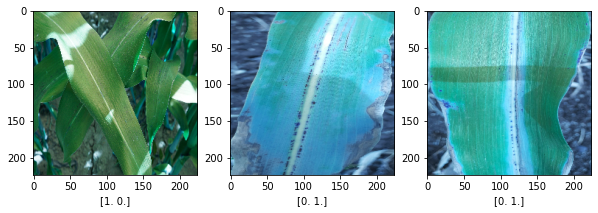

In [ ]:
import random
length = len(labels_test)
import matplotlib.pyplot as plt
index = [2, length -2, length - 3]
fig = plt.figure(figsize=(10, 7)) 
for inu, i in enumerate(index):  
  # plt.imshow(data_test[i])
  fig.add_subplot(2, 3, inu+1)
  plt.imshow(data_test[i]) 
  plt.xlabel(str(labels_test[i]))
  

In [ ]:
import numpy as np
for inu, i in enumerate(index):
  # print(data_test[i].shape)
  input_data  = data_test[i].reshape(1, 224, 224, 3)
  output = model_out_load.predict(input_data)
  out_label = np.argmax(output, axis = 1)
  print(max(output))

NameError: ignored

In [ ]:
# build the model
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
# flat1 = Flatten()(base_model.layers[-1].output)
# class1 = Dense(1024, activation='relu')(flat1)
# output = Dense(2, activation='softmax')(class1)
# # define new model
# model = Model(inputs=base_model.inputs, outputs=output)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(base_model.layers[-1].output)
prediction_layer = Dense(2, activation = 'softmax')
prediction_batch = prediction_layer(feature_batch_average)
model_out = Model(inputs = base_model.input, outputs = prediction_batch)


In [ ]:
# model_out.summary()



In [ ]:
from keras.models import load_model
# model_out_load = load_model('./drive/MyDrive/multi_weights_mobilen#etv2.hdf5')

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./drive/MyDrive/MultiClass_Binary_ResNet50.hdf5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
# optimizer function
opt = SGD(lr=0.001, momentum=0.8)

# compile the model
model_out.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network 
H = model_out.fit_generator(train_gen, epochs = 20, validation_data=(data_test, labels_test), callbacks = [model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
63/63 [==============================] - 350s 5s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4909 - val_accuracy: 0.8083
Epoch 2/20
63/63 [==============================] - 348s 6s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4760 - val_accuracy: 0.8083
Epoch 3/20
63/63 [==============================] - 340s 5s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4517 - val_accuracy: 0.8167
Epoch 4/20
63/63 [==============================] - 343s 5s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4532 - val_accuracy: 0.8167
Epoch 5/20
63/63 [==============================] - 337s 5s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4654 - val_accuracy: 0.8167
Epoch 6/20
63/63 [==============================] - 340s 5s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4612 - val_accuracy: 0.8167
Epoch 7/20
63/63 [==============================] - 339s 5s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4653 - val_accuracy: 0.8167
Epoch 8/20
63